# Numpy

科学计算的一个基础包。

不管是 PyTorch 还是 TensorFlow，或者是传统机器学习的 scikit-learn，在读入数据这一块，都会先把数据转换成 NumPy 的数组，然后再进行后续的一系列操作。

数组对象是 NumPy 中最核心的组成部分，这个数组叫做 ndarray，是“N-dimensional array”的缩写。其中的 N 是一个数字，指代维度。 Numpy 数组的一些特点：

1. Python 中的列表可以动态地改变，而 NumPy 数组是不可以的，它在创建时就有固定大小了。改变 Numpy 数组长度的话，会新创建一个新的数组并且删除原数组。
2. NumPy 数组中的数据类型必须是一样的，而列表中的元素可以是多样的。
3. NumPy 针对 NumPy 数组一系列的运算进行了优化，使得其速度特别快，并且相对于 Python 中的列表，同等操作只需使用更少的内存。


In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 创建

最简单的方法就是把一个列表传入到 np.array() 或 np.asarray() 中，其中 **np.array() 属于深拷贝，np.asarray() 则是浅拷贝**。

In [2]:
a = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
])
b = np.asarray([[5, 6], [7, 8]])

print(a)
print(b)

[[1 2]
 [3 4]
 [5 6]]
[[5 6]
 [7 8]]


作为一个数组，NumPy 有一些固有的属性：纬度 dimension 、形状 shape 、大小 size 与数据类型 datatype 。

常用的创建方法：

- np.reshape() 可以变换数组的形状。
- np.astype() 改变数组的数据类型，不过改变数据类型会创建一个新的数组，而不是改变原数组的数据类型。
- np.ones() 创建全 0 的数组
- np.zeros() np.ones() 用来创建一个全 1 的数组
- np.arange([start, ]stop, [step, ]dtype=None) 创建一个在[start, stop) 区间的数组，元素之间的跨度是 step。
- np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None) 创建一个从开始数值到结束数值的等差数列。

In [3]:
print(a)

print("dimension:", a.ndim)
print("shape:", a.shape)
print("size:", a.size)
print("data type:", a.dtype)

# C-like, Fortran-like, 几乎全部使用默认的 C-like
print(a.reshape(2,3, order='C'))
a.reshape(2,3, order='F')

[[1 2]
 [3 4]
 [5 6]]
dimension: 2
shape: (3, 2)
size: 6
data type: int64
[[1 2 3]
 [4 5 6]]


array([[1, 5, 4],
       [3, 2, 6]])

In [4]:
print(np.zeros([2,3]))
print(np.ones([2,3]) * 5)
print(np.arange(0, 9))
print(np.arange(0, 9, 3))
print(np.linspace(0, 9, num=3))

[[0. 0. 0.]
 [0. 0. 0.]]
[[5. 5. 5.]
 [5. 5. 5.]]
[0 1 2 3 4 5 6 7 8]
[0 3 6]
[0.  4.5 9. ]


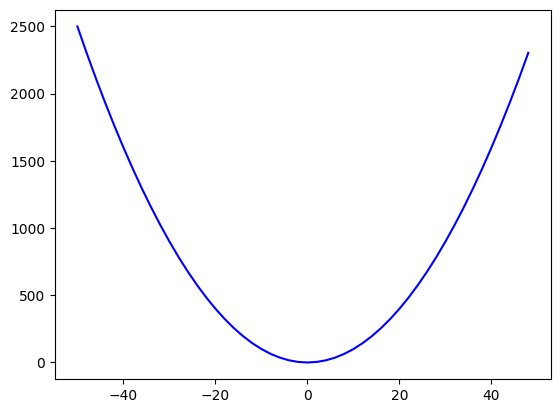

In [5]:
# y = x^2

X = np.arange(-50, 50, 2)
# X = np.arange(-50, 51, 2)
Y = X ** 2

plt.plot(X, Y, color='b')
plt.show()

## 数组的轴

这是一个非常重要的却不好理解的概念。

众向是 0 轴 （行），横向是 1 轴 （列）。

假设下面的是 4 名同学，关于 3 款游戏的评分

In [6]:
score = np.random.randint(10, size=(4,3))
score

array([[3, 5, 3],
       [8, 3, 5],
       [7, 8, 9],
       [8, 7, 9]])

In [7]:
# 计算每款有些的总评分
# => 沿着 0 轴的方向进行求和
print(np.sum(score, axis=0))

# 计算每名同学的评分总和
print(np.sum(score, axis=1))

# 计算每位同学的评分平均值
print(np.mean(score, axis=1))

[26 23 26]
[11 16 24 24]
[3.66666667 5.33333333 8.         8.        ]


多维数组

形状为 (a, b, c) 的数组，
沿着 0 轴聚合后，形状变为 (b, c)；
沿着 1 轴聚合后，形状变为 (a, c)；
沿着 2 轴聚合后，形状变为 (a, b)；
更高维数组以此类推。

In [8]:
a = np.arange(18).reshape(3, 2, 3)
# a = np.random.randint(18, size=(3,2,3))
a

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]]])

0. 

```
max(
    [
        [[ 0,  1,  2], [ 3,  4,  5]],
        [[ 6,  7,  8], [ 9, 10, 11]],
        [[12, 13, 14], [15, 16, 17]],
    ]
)
```

1. 

```
[
    max( [[ 0,  1,  2], [ 3,  4,  5]] ),
    max( [[ 6,  7,  8], [ 9, 10, 11]] ),
    max( [[12, 13, 14], [15, 16, 17]] ),
]
```

2. 

```
[
    [ max ( [ 0,  1,  2] ), max ( [ 3,  4,  5] ) ],
    [ max ( [ 6,  7,  8] ), max ( [ 9, 10, 11] ) ],
    [ max ( [12, 13, 14] ), max ( [15, 16, 17] ) ],
]
```

将上面的数组 a 用 3 色框来表示，最外层绿色，然后是蓝色，最内层红色。

当 axis=0 时，就意味着将三个绿框的数据聚合在一起，结果是一个 (2,3) 的数组，数组内容为：

```python
[ [(max(a000​,a100​,a200​),max(a001​,a101​,a201​),max(a002​,a102​,a202​))],
  [(max(a010​,a110​,a210​),max(a011​,a111​,a211​),max(a012​,a112​,a212​))] ]​
```

In [9]:
np.max(a, axis=0)

array([[12, 13, 14],
       [15, 16, 17]])

当 axis=1 时，就意味着每个绿框内的蓝框聚合在一起，结果是一个（3，3）的数组，数组内容为：

```python
[ [(max(a000​,a010​),max(a001​,a011​),max(a002​,a012​))],
  [(max(a100​,a110​),max(a101​,a111​),max(a102​,a112​))],
  [(max(a200​,a210​),max(a201​,a211​),max(a202​,a212​))], ]​
```

In [10]:
np.max(a, axis=1)

array([[ 3,  4,  5],
       [ 9, 10, 11],
       [15, 16, 17]])

当 axis=2 时，就意味着每个蓝框中的红框聚合在一起，结果是一个（3，2）的数组，数组内容如下所示：

```python
[ [(max(a000​,a001​,a002​),max(a010​,a011​,a012​))],
  [(max(a100​,a101​,a102​),max(a110​,a111​,a112​))],
  [(max(a200​,a201​,a202​),max(a210​,a211​,a212​))], ]​
```

In [11]:
np.max(a, axis=2)

array([[ 2,  5],
       [ 8, 11],
       [14, 17]])

## 深度学习常用操作

### 以图片读取为例

图片的格式是 RGB 格式，有 R、G、B 三个通道。
Pillow 读入后通道的顺序就是 R、G、B，而 OpenCV 读入后顺序是 B、G、R。

从 Pillow 读取

In [12]:
from PIL import Image

im = Image.open('../res/images/geektime.webp')
print('size:', im.size)

im_pillow = np.asarray(im)
print(type(im_pillow))
im_pillow.shape

size: (318, 116)
<class 'numpy.ndarray'>


(116, 318, 3)

从 OpenCV 读取

In [13]:
import cv2


im_cv2 = cv2.imread('../res/images/geektime.webp')
print(type(im_cv2))

if im_cv2 is None:
    print('im_cv2 is None')
else:
    print(im_cv2.shape)
    # cv2.imshow("dog", im_cv2)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

<class 'NoneType'>
im_cv2 is None


In [14]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.6.0 =====================================
  Version control:               unknown

  Extra modules:
    Location (extra):            /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/opencv_contrib-4.6.0/modules
    Version control (extra):     unknown

  Platform:
    Timestamp:                   2022-09-30T14:42:48Z
    Host:                        Darwin 20.6.0 arm64
    CMake:                       3.22.1
    CMake generator:             Ninja
    CMake build tool:            /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/_build_env/bin/ninja
    Configuration:               Release

  CPU/HW features:
    Baseline:                    NEON FP16

  C/C++:
    Built as dynamic libs?:      YES
    C++ standard:                11
    C++ Compiler:                /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/

使用 索引和切片 提取出图片的 RGB 三个通道的数据

In [15]:
im_pillow_c1 = im_pillow[:, :, 0]
im_pillow_c2 = im_pillow[:, :, 1]
im_pillow_c3 = im_pillow[:, :, 2]

In [16]:
im_pillow_c3

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
zeros = np.zeros((im_pillow.shape[0], im_pillow.shape[1], 1))
zeros.shape

(116, 318, 1)

数组的拼接

使用 np.concatenate

In [18]:
print(im_pillow_c1.shape)
print(zeros.shape)

# 不同维度，需要增加 im_pillow_c1 的维度
im_pillow_c1 = im_pillow_c1[:,:, np.newaxis]
im_pillow_c1.shape

(116, 318)
(116, 318, 1)


(116, 318, 1)

In [19]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1, zeros, zeros), axis=2)
im_pillow_c1_3ch.shape

(116, 318, 3)

直接赋值

In [20]:
im_pillow_c2_3ch = np.zeros(im_pillow.shape)
im_pillow_c2_3ch[:,:,1] = im_pillow_c2
im_pillow_c2_3ch.shape

(116, 318, 3)

In [21]:
im_pillow_c3_3ch = np.zeros(im_pillow.shape)
im_pillow_c3_3ch[:,:,2] = im_pillow_c3
im_pillow_c3_3ch.shape

(116, 318, 3)

现在可以将三个通道的 RGB 图片打印出来验证通道顺序。

预期的输出顺序应该是：原图、R 通道、G 通道与 B 通道。

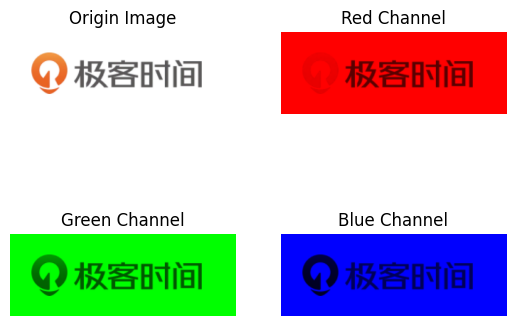

In [22]:
def plot_channel(orign, r, g, b):
    plt.subplot(2,2,1)
    plt.axis('off')
    plt.title('Origin Image')
    plt.imshow(orign)

    plt.subplot(2,2,2)
    plt.axis('off')
    plt.title('Red Channel')
    plt.imshow(r.astype(np.uint8))

    plt.subplot(2,2,3)
    plt.axis('off')
    plt.title('Green Channel')
    plt.imshow(g.astype(np.uint8))

    plt.subplot(2,2,4)
    plt.axis('off')
    plt.title('Blue Channel')
    plt.imshow(b.astype(np.uint8))

plot_channel(im_pillow, im_pillow_c1_3ch, im_pillow_c2_3ch, im_pillow_c3_3ch)


更加简单的获取三个通道的 BGR 数据的方式：只需要将图片读入后，直接将其中的两个通道赋值为 0 即可

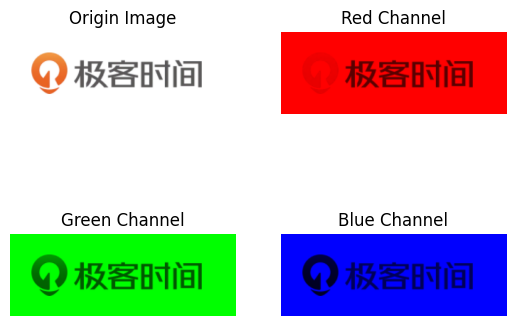

In [23]:
# im_pillow2 = np.asarray(im) # Error，因为 asarray 是浅拷贝

# 保留 R 通道
im_pillow_r = np.array(im)
im_pillow_r.shape
# im_pillow_r[:,:,1]=0
# im_pillow_r[:,:,2]=0
# 简写
im_pillow_r[:,:,1:]=0

# 保留 G 通道
im_pillow_g = np.array(im)
im_pillow_g[:,:,0]=0
im_pillow_g[:,:,2]=0

# 保留 B 通道
im_pillow_b = im_pillow.copy()
# im_pillow2[:,:,0]=0
# im_pillow2[:,:,1]=0
# 简写
im_pillow_b[:,:,0:2]=0

plot_channel(im_pillow, im_pillow_r, im_pillow_g, im_pillow_b)

评估模型时常用

Argmax 、 Argmin ：求最大 / 最小值对应的索引
Argsort：数组排序后返回原数组的索引

argsort(a, axis=-1, kind=None) 包括后面这几个关键参数：

- a 是要进行排序的原数组；
- axis 是要沿着哪一个轴进行排序，默认是 -1，也就是最后一个轴；
- kind 是采用什么算法进行排序，默认是快速排序，还有其他排序算法，可以参考文档。

In [24]:
# 假设下面是模型输出的概率

probs = np.array([0.075, 0.15, 0.075, 0.15, 0.0, 0.05, 0.05, 0.2, 0.25])

In [25]:
# 要得到：概率最大的 3 个值的坐标 及 值

probs_idx_sorted = np.argsort(-probs)
print(probs_idx_sorted)
print(probs_idx_sorted[:3])
print(probs[probs_idx_sorted[:3]])

[8 7 1 3 0 2 5 6 4]
[8 7 1]
[0.25 0.2  0.15]


In [26]:
# 思考：

scores = np.random.rand(6, 6, 2)
scores[:,:,1] = 1 - scores[:,:,0]

# 根据 scores 生产数组 mask，要求 scores 通道 0 的值如果大于通道 1 的值，则 mask 对应的位置为 0，否则为 1。
print(scores[:,:,0])
print(scores[:,:,1])

[[0.45775297 0.35783047 0.73274697 0.91351454 0.50654676 0.26450436]
 [0.79547471 0.10545365 0.31671644 0.13994282 0.84077759 0.32235291]
 [0.98769793 0.037584   0.4155194  0.76544133 0.05473828 0.18195355]
 [0.40508983 0.70367681 0.47200023 0.58565738 0.55485655 0.93560406]
 [0.81924072 0.18837215 0.20280915 0.49245023 0.61723688 0.98811475]
 [0.16662933 0.7594434  0.22194566 0.14575886 0.65377295 0.71452551]]
[[0.54224703 0.64216953 0.26725303 0.08648546 0.49345324 0.73549564]
 [0.20452529 0.89454635 0.68328356 0.86005718 0.15922241 0.67764709]
 [0.01230207 0.962416   0.5844806  0.23455867 0.94526172 0.81804645]
 [0.59491017 0.29632319 0.52799977 0.41434262 0.44514345 0.06439594]
 [0.18075928 0.81162785 0.79719085 0.50754977 0.38276312 0.01188525]
 [0.83337067 0.2405566  0.77805434 0.85424114 0.34622705 0.28547449]]


In [27]:
# mask = np.zeros(np.shape(scores[:,:, 0]))
mask = np.argmax(scores, axis=2)
mask

array([[1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0]])

In [28]:
def fn(a, b):
    return 'o' if a > b else '-'

vfn = np.vectorize(fn)
mask = vfn(scores[:,:, 0], scores[:,:, 1])
mask

array([['-', '-', 'o', 'o', 'o', '-'],
       ['o', '-', '-', '-', 'o', '-'],
       ['o', '-', '-', 'o', '-', '-'],
       ['-', 'o', '-', 'o', 'o', 'o'],
       ['o', '-', '-', '-', 'o', 'o'],
       ['-', 'o', '-', '-', 'o', 'o']], dtype='<U1')

<hr />

np.outer() 矩阵外积，np.inner() 矩阵内积 （和 np.dot() 的用法稍稍有些不同，可以理解成 np.dot(a, b）= np.inner(a, b.T), 把 b 做一次转置）。

In [29]:
a = np.array([
    [1, 2],
    [3, 4],
])
b = np.asarray([[5, 6], [7, 8]])

print(a)
print(b)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [30]:
np.dot(a,b )
# == 
a.dot(b)

array([[19, 22],
       [43, 50]])

In [31]:
bt = b.T

In [32]:
z1 = np.inner(a, bt) 
z2 = np.dot(a, b)

z1 == z2

array([[ True,  True],
       [ True,  True]])

In [33]:
h = np.array([150, 166, 183, 170])
h.max()

183

In [34]:
h.argsort()

array([0, 1, 3, 2])

In [35]:
np.mean(h)
np.median(h)
np.std(h)

11.776565713313877

In [36]:
n = np.array([1,2,3,4])
n.prod() # 累乘 n!

24

In [37]:
np.nonzero(n)
np.count_nonzero(n)

4

自由的取值截取空间可以用 np.clip() 来做上下界限的值截取。

In [38]:
h.clip(160, 168)

array([160, 166, 168, 168])

In [39]:
a = np.array([1,2,3,4,5,6])
amat = np.expand_dims(a, axis=0)
# ==
a_2d = a[np.newaxis, :]
a_2d

array([[1, 2, 3, 4, 5, 6]])

In [40]:
a_2d.squeeze(axis=0)

array([1, 2, 3, 4, 5, 6])

In [41]:
a.reshape([3,1,2])

array([[[1, 2]],

       [[3, 4]],

       [[5, 6]]])

In [42]:
np.column_stack([a, a])
# !==
np.hstack([a_2d, a_2d])

array([[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]])

In [43]:
np.row_stack([a, a])
np.vstack([a,a])

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

In [44]:
b = np.array(
[[ 1, 11, 2, 22],
 [ 3, 33, 4, 44],
 [ 5, 55, 6, 66],
 [ 7, 77, 8, 88]]
)
tmp = np.vsplit(b, indices_or_sections=1)
print(tmp)
np.shape(tmp)

[array([[ 1, 11,  2, 22],
       [ 3, 33,  4, 44],
       [ 5, 55,  6, 66],
       [ 7, 77,  8, 88]])]


(1, 4, 4)

In [45]:
# fullfill 9
np.full([2,3], 9)

array([[9, 9, 9],
       [9, 9, 9]])

In [46]:
np.zeros_like(b)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [47]:
# get 5 numbers between start and end
np.linspace(-1, 1, 5 , endpoint=True)

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [48]:
# but these numbers are not
# can be a placeholder and generated quicker than zeros, ones and full
np.empty([4,3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [49]:
from random import random

np.arange(6).reshape([2, 3]) * random()


array([[0.        , 0.69452768, 1.38905535],
       [2.08358303, 2.77811071, 3.47263838]])

In [50]:
from numpy.random import randint

# randint(1, 10)

# np.random.rand(2, 3)
# # ==
# np.random.random([2, 3])

randint(-3, 6, size=10)

array([ 0,  1, -1,  5,  5,  2, -1,  3,  5, -1])

In [51]:
# randomly pick up from data arrary

choice = np.array([2,3,4,1,7,6,5])
# np.random.choice(choice)
# np.random.choice(choice, size=3)
# np.random.choice(choice, size=3, replace=False)

np.random.choice(choice, size=3, replace=False, p=[0.1,0.3,0.1,0.1,0.2,0.1,0.1])

array([1, 4, 2])

In [52]:
# shuffling

choice_copy = np.copy(choice)
np.random.shuffle(choice_copy)
choice_copy

array([2, 5, 4, 7, 6, 3, 1])

In [53]:
np.random.permutation(10)

data = np.arange(12).reshape(6,2)
np.random.permutation(data)

array([[10, 11],
       [ 4,  5],
       [ 6,  7],
       [ 0,  1],
       [ 8,  9],
       [ 2,  3]])

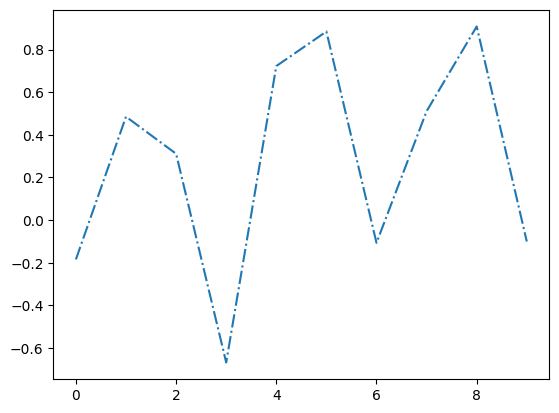

array([-0.18423331,  0.48512644,  0.31137591, -0.66745334,  0.72254707,
        0.88452035, -0.10652364,  0.51073179,  0.90821348, -0.10032894])

In [54]:
# 正态分布
data = np.random.normal(1, 0.2, 10)
# 均匀分布
data = np.random.uniform(-1,1,10)

plt.plot(data, '-.')
plt.show()
data

In [55]:
# 伪随机
# np.random.seed(1)
data1 =np.random.randint(2,10, size=3)
data2 =np.random.randint(2,10, size=3)

print(data1)
print(data2)

[2 3 2]
[8 3 9]


In [56]:
from statistics import mean
import timeit
from functools import partial

from numpy import percentile
        
def get_run_time(func, *args):
    repeat = 3
    number = 200
    return percentile(timeit.Timer(partial(func, *args)).repeat(repeat=repeat, number=number), 90) / number


In [57]:
a = np.random.rand(1000, 1000)
b = np.random.rand(1000, 1000)

def f1():
    global b
    # 这会产生新的 b
    b = 2*b

def f2():
    global a
    # 这不会产生新的 a
    a *= 2    # 和 a[:] *= 2 一样

print('%.6f - b = 2*b' % get_run_time(f1))
print('%.6f - a *= 2' % get_run_time(f2))


0.000538 - b = 2*b
0.000247 - a *= 2


In [58]:
# 矩阵展平, 用到 np.flatten() 或者 np.ravel()
# 如果用 ravel(), 需要 copy 的时候才会被 copy

def f1():
    a.flatten()

def f2():
    b.ravel()

print('%.6f - flatten' % get_run_time(f1))
print('%.6f - ravel' % get_run_time(f2))

0.000448 - flatten
0.000000 - ravel


In [59]:
# take 替代 fancy indexing
a = np.random.rand(1000000, 10)
indices = np.random.randint(0, len(a), size=10000)

def f1():
    # fancy indexing
    _ = a[indices]

def f2():
    # take
    _ = np.take(a, indices, axis=0)

print('%.6f - [indices]' % get_run_time(f1))
print('%.6f - take' % get_run_time(f2)) 

0.000098 - [indices]
0.000050 - take


In [60]:
a = np.random.rand(10000, 10)
mask = a[:, 0] < 0.5

def f1():
    _ = a[mask]

def f2():
    _ = np.compress(mask, a, axis=0)
        

print('%.6f - [mask]' % get_run_time(f1))
print('%.6f - compress' % get_run_time(f2))

0.000078 - [mask]
0.000025 - compress


In [61]:
# out 参数
a = np.zeros([1000, 1000])
b = np.zeros_like(a)
c = np.zeros_like(a)

def f1():
    a[:] = np.add(a, 1)  # 把计算结果赋值回原数据

def f2():
    np.add(b, 1, out=b)  # 把计算结果赋值回原数据

def f3():
    _c = np.add(c, 1)   # 把计算结果赋值到新数据


print('%.6f - without out' % get_run_time(f1))     
print('%.6f - out' % get_run_time(f2))
print('%.6f - new data' % get_run_time(f3))


0.000892 - without out
0.000262 - out
0.000699 - new data


In [62]:
a = np.random.rand(10000, 10)
mask = a[:, 0] < 0.5
print(a.shape)
print(mask.shape)

(10000, 10)
(10000,)


In [63]:
data = np.random.rand(4, 3)
weights = np.random.rand(3, 2)
output = np.dot(data, weights)

print("data shape:", data.shape)
print("weights shape:", weights.shape)
print("output shape:", output.shape)
output

data shape: (4, 3)
weights shape: (3, 2)
output shape: (4, 2)


array([[1.4589706 , 1.50456571],
       [0.39032669, 0.59810076],
       [0.54281264, 1.25575684],
       [0.6891954 , 0.49369713]])

In [64]:
def draw_scatter(x, y):
    plt.scatter(x.ravel(), y.ravel())
    plt.show()

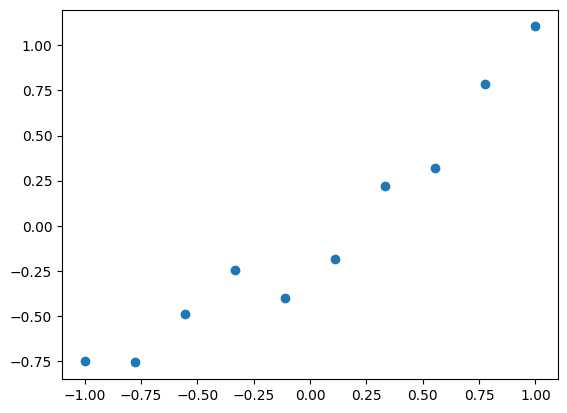

In [65]:
x = np.linspace(-1, 1, 10)[:, None]     # shape [10, 1]
y = np.random.normal(loc=0, scale=0.2, size=[10, 1]) + x   # shape [10, 1]

draw_scatter(x, y)